Analysis of hourly data for intraday on-shore wind power generation measured for one year
Data gotten from class project

author: victor akinwande

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from datetime import datetime
import statsmodels.tsa.stattools as stattools
from sklearn.metrics import mean_squared_error
from statsmodels.distributions.empirical_distribution import ECDF
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

%matplotlib inline

windDataset = pd.read_csv('WindGeneration.csv')

sns.set_style('ticks')
windDataset['Date'] = pd.to_datetime(windDataset['Date'], dayfirst=True)
windDataset['Time'] = pd.to_datetime(windDataset['Time'], unit='h').dt.time
windDataset['DateTime'] = windDataset.apply(lambda x: datetime.combine(x['Date'], x['Time']), axis=1)
windDataset = windDataset.interpolate()

time series of the wind generation over time.  showing evidence of annual seasonality? 

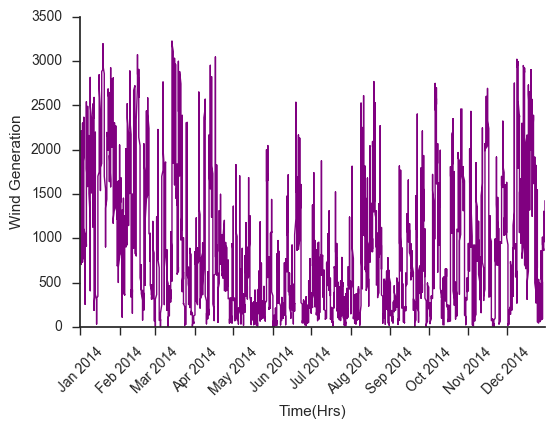

In [6]:
analysis_1()

change in wind generation over time as a percentage of the maximum generation. 
Is there evidence of annual seasonality? 

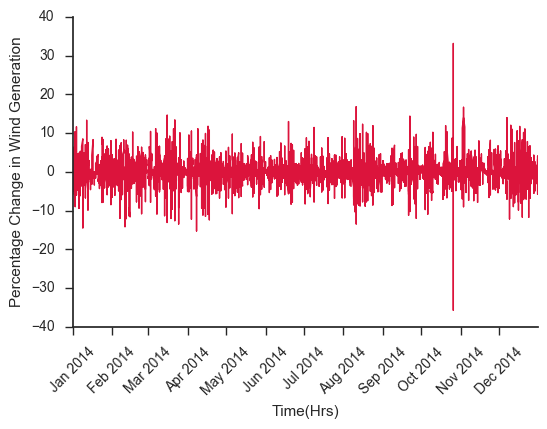

In [8]:
max_value = windDataset['Wind Generation'].max()
windDataset['Change In Wind Generation'] = \
((windDataset['Wind Generation'].shift(1) - windDataset['Wind Generation'])/max_value ) * 100
# drop the first empty column
windDataset = windDataset.ix[1:]

analysis_2(windDataset)

positive and negative ramps in wind power generation

empirical cumulative distribution functions (CDF) for both the positive and negative ramps 
plotted with the probability on a vertical logarithmic axis.

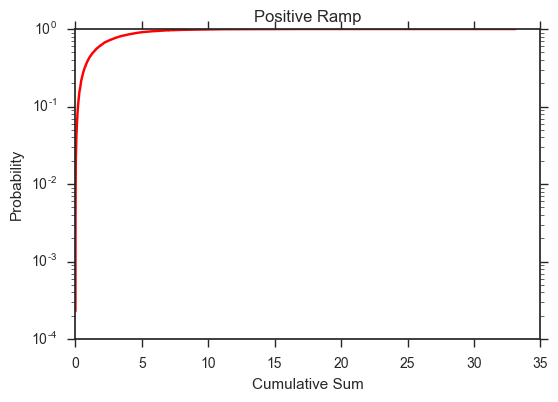

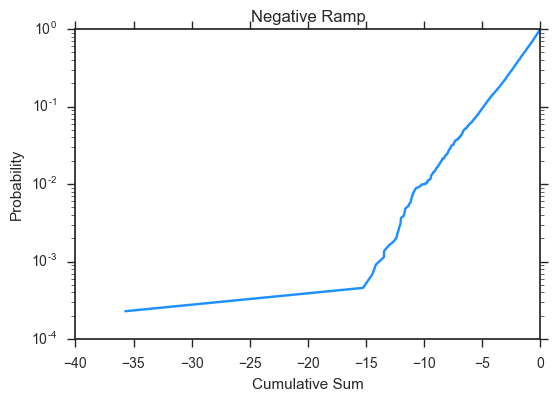

In [10]:
analysis3_1()

analysis3_2()

Plot the CDF for a normal distribution with mean-zero and standard deviation from the observations.  

Is the normal distribution a good model for wind power extremes? 

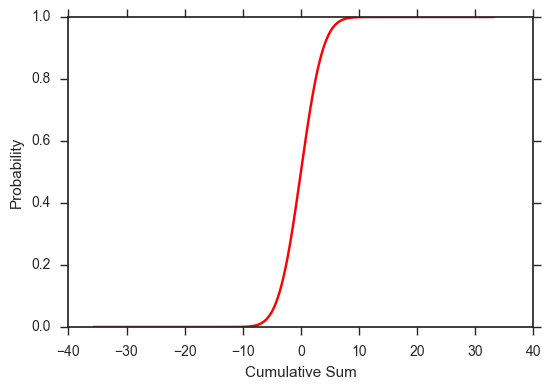

In [11]:
analysis3_3()

Variability in wind generation over different timescales. Variability over timescales from one hour to one day using plots for the 1%, 5%, 95% and 99% percentiles of ramps distribution


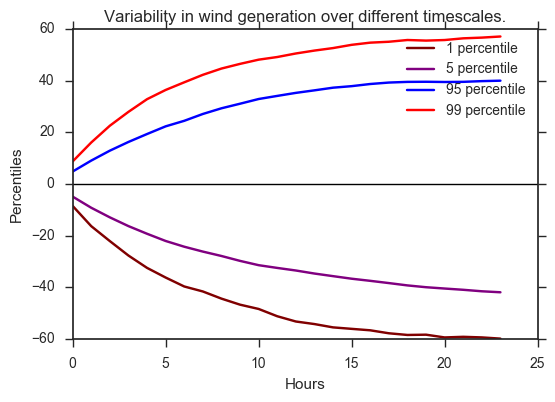

In [14]:
analysis4()

autocorrelation of wind generation for lags over 10 days. what doesthe structure of the autocorrelation tell?
 

('Auto Correlation - %d', 0.99978390151628116)


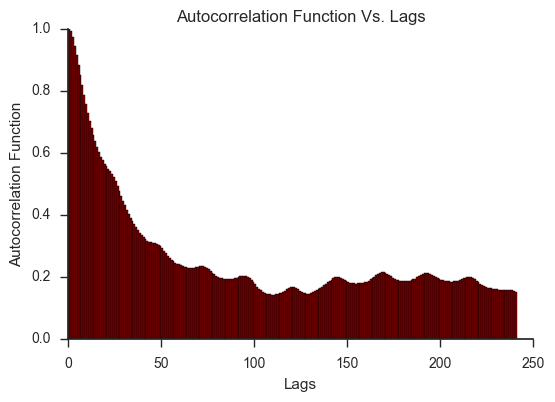

In [16]:
acfValues = stattools.acf(windDataset['Wind Generation'], nlags=240)# 10 days X 24 hours
index = np.arange(0,len(acfValues),1)
accal = pd.DataFrame(acfValues)

print('Auto Correlation - %d', pd.DataFrame(acfValues)[0].autocorr())

analysis5()

autocorrelation of change in wind generation for lags over 10 days with horizontal lines to 
detect statistically significance values (p<0.05). Is there any evidence of diurnal seasonality? 

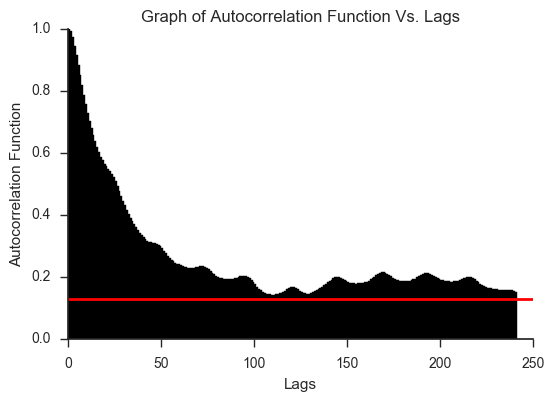

In [22]:
analysis6()

Variance ratio test to investigate the structure of the wind generation time series. Can the null hypothesis of a random walk be rejected? Is there evidence of either mean-reversion of meanaversion? 


In [23]:
analysis7()

t-tatistic: -14.404882
p-value: 0.000000
Critical Values:
	5%: -2.862
	1%: -3.431
	10%: -2.567


Estimate of the optimal window for simple moving average.  Is there a simple moving average that improves on the persistence benchmark? 

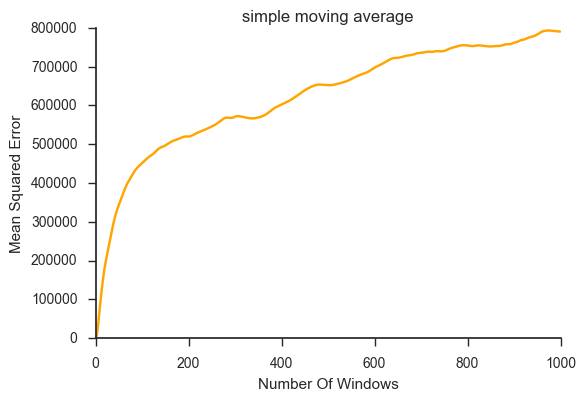

In [24]:
analysis8()

In [20]:
def analysis_1():
    plt.plot(windDataset['Date'], windDataset['Wind Generation'], linewidth=1, color = 'purple')
    plt.xlabel('Time(Hrs)')
    plt.ylabel('Wind Generation')
    plt.xticks(rotation='45')
    sns.despine()
    
    plt.title("time series of the wind generation over time")
    plt.show()



def analysis_2(windDataset):
    plt.plot(windDataset['Date'], windDataset['Change In Wind Generation'], linewidth=1, color = 'crimson')
    plt.xlabel('Time(Hrs)')
    plt.ylabel('Percentage Change in Wind Generation')
    plt.xticks(rotation='45')
    sns.despine()
    
    plt.title("change in wind generation over time as a percentage of the maximum generation")
    plt.show()


def analysis3_1():
    PositiveWindGenerated = windDataset[windDataset['Change In Wind Generation'] > 0]
    PositiveECDF =ECDF(PositiveWindGenerated['Change In Wind Generation'])
    plt.plot(PositiveECDF.x, PositiveECDF.y, color='red')
    plt.yscale('log')
    plt.title('Positive Ramp')
    plt.xlabel('Cumulative Sum')
    plt.ylabel('Probability')
    
    plt.show()


def analysis3_2():
    NegativeWindGenerated = windDataset[windDataset['Change In Wind Generation'] < 0]
    NegativeECDF =ECDF(NegativeWindGenerated['Change In Wind Generation'])
    plt.plot(NegativeECDF.x, NegativeECDF.y, color='dodgerblue')
    plt.yscale('log')
    plt.title('Negative Ramp')
    plt.xlabel('Cumulative Sum')
    plt.ylabel('Probability')
   
    plt.title("")
    plt.show()


def analysis3_3():
    sort = windDataset['Change In Wind Generation'].sort_values()
    norm.cdf(windDataset['Change In Wind Generation'],0,np.std(windDataset['Change In Wind Generation']))
    plt.plot(sort,norm.cdf(sort,0,np.std(sort)), color='red')
    plt.xlabel('Cumulative Sum')
    plt.ylabel('Probability')
   
    plt.show()


def analysis4():
    distributions = pd.DataFrame()
    index_values = []
    for i in range(1, 25):
        rt = ((windDataset['Wind Generation'].shift(i) - windDataset['Wind Generation'])/max_value ) * 100
        distributions[i] = rt
        index_values.append(i-1)
        percentile_1 = []
    percentile_5 = []
    percentile_95 = []
    percentile_99 = []
    
    for column in distributions:
        column_i = distributions[column].dropna()
        percentiles = np.percentile(np.asarray(column_i),[1,5,95, 99])
        percentile_1.append(percentiles[0])
        percentile_5.append(percentiles[1])
        percentile_95.append(percentiles[2])
        percentile_99.append(percentiles[3])
        
    f, ax = plt.subplots()
    ax.plot(index_values, percentile_1, color='maroon', label='1 percentile')
    ax.plot(index_values, percentile_5, color='purple', label='5 percentile')
    ax.plot(index_values, percentile_95, color='blue', label='95 percentile')
    ax.plot(index_values, percentile_99, color='red', label='99 percentile')
    ax.axhline(y=0, color ='black', linewidth=1)
    plt.xlabel('Hours')
    plt.ylabel('Percentiles')
    plt.legend()
    plt.title("Variability in wind generation over different timescales.")
    plt.show()
     



def analysis5():
    plt.bar(index, acfValues, width=1.0, color='maroon')
    plt.xlabel('Lags')
    plt.ylabel('Autocorrelation Function')
    plt.title('Autocorrelation Function Vs. Lags')
    sns.despine()
    
    plt.show()


def analysis6():
    horzLine = 2.0/(np.sqrt(len(acfValues)))
    plt.bar(index, acfValues, width=1.0, color='black')
    plt.axhline(y=horzLine, color='red', linestyle='-', linewidth=2)
    plt.xlabel('Lags')
    plt.ylabel('Autocorrelation Function')
    plt.title('Graph of Autocorrelation Function Vs. Lags')
    sns.despine()
    
    plt.show()

def analysis7():
    variance_test = stattools.adfuller(windDataset['Wind Generation'], 1)
    print('t-tatistic: %f' % variance_test[0])
    print('p-value: %f' % variance_test[1])
    print('Critical Values:')
    for key, value in variance_test[4].items():
        print('\t%s: %.3f' % (key, value))

def analysis8():
    mse_calculated= []
    for i in range(1,1000):
        windDataset['window'] = windDataset['Wind Generation'].rolling(window=i,center=False).mean()
        mse_calculated.append(mean_squared_error(windDataset['Wind Generation'].interpolate(), windDataset['window'].fillna(value=0)))

    plt.plot(range(1,1000),mse_calculated, color='orange')
    plt.xlabel('Number Of Windows')
    plt.ylabel('Mean Squared Error')
    sns.despine()
    plt.title("simple moving average")
    plt.show()